In [45]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from optimization_dummy import run as run_dummy

results = {1: {}, 2: {}, 3: {}}
pops = {1: {}, 2: {}, 3: {}}
envs = {1: {}, 2: {}, 3: {}}

gens = 30

for enemy in [1, 2, 3]:
    means = []
    bests =[]
    # stds = np.zeros(gens)
    
    for i in range(2):
        run_results, pop, env = run_dummy(enemy)
        
        means.append(run_results['mean'])
        bests.append(run_results['best'])
        
        #results[enemy].append(run_results)
    

    pops[enemy] = pop
    envs[enemy] = env

    # means /= 10
    # # bests /= 10
    # stds /= 10
    
    means = np.array(means)
    mean_r = [np.mean(means[:,i]) for i in range(gens)]
        
    bests = np.array(bests)
    best_r = [np.mean(bests[:,i]) for i in range(gens)]

    means_std = np.std(means, axis=0)
    bests_std = np.std(bests, axis=0)




    results[enemy]['mean'] = mean_r
    results[enemy]['best'] = best_r
    results[enemy]['mean_std'] = means_std
    results[enemy]['best_std'] = bests_std


MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 39.179917 -2.475594 9.585111
Initial mutation rate: 0.2
diversity 26.319032294156862
Mutation rate increased to 0.22000000000000003 at diversity 26.319032294156862
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 39.17991706964764 - Mean: -1.5776132681456176
diversity 26.57498761481717
Mutation rate at generation 2: 0.22000000000000003
Gen 2 - Best: 75.01354799471557 - Mean: 0.045250227971630606
diversity 26.72

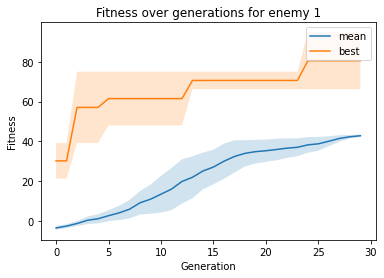

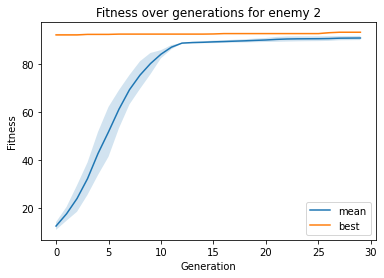

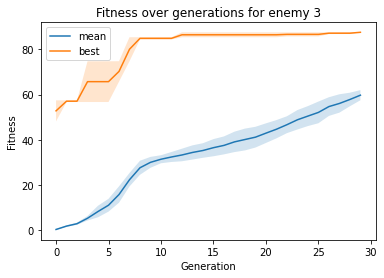

In [46]:
# plot means and best fitness
import matplotlib.pyplot as plt

for i in [1,2,3]:
    plt.figure()
    plt.plot(results[i]['mean'], label='mean')
    plt.plot(results[i]['best'], label='best')
    plt.fill_between(range(gens), results[i]['mean'] - results[i]['mean_std'], results[i]['mean'] + results[i]['mean_std'], alpha=0.2)
    plt.fill_between(range(gens), results[i]['best'] - results[i]['best_std'], results[i]['best'] + results[i]['best_std'], alpha=0.2)
    plt.legend()
    # add title: fitness over generations for enemy 2
    plt.title('Fitness over generations for enemy ' + str(i))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')


array([82, 82, 80, 76, 82, 80, 76, 78, 74, 72, 76, 76, 76, 76, 72, 70, 70,
       70, 76, 70, 70, 70, 70, 70, 70, 70, 70, 68, 70, 72, 72, 72, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

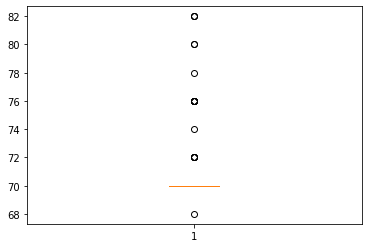

In [7]:
from optimization_dummy import evaluate_gain

#fit_pop1 = np.array([evaluate(envs[enemy], pops[1]) for enemy in [1,2,3]])
gain_pop1 = evaluate_gain(envs[2], pops[2])
# fit_pop2 = [evaluate(envs[enemy], pops[3]) for enemy in [1,2,3]]

# print(np.mean(fit_pop1, axis= 1))
# # print(fit_pop1)

# plt.figure()
# plt.bar([1,2,3], np.mean(fit_pop1, axis= 1))
# plt.xticks([1,2,3], ['enemy 1', 'enemy 2', 'enemy 3'])
# plt.ylabel('Fitness')
# plt.title('Fitness for each enemy')

plt.figure()
plt.boxplot(gain_pop1)
gain_pop1

In [42]:
means[:, 0]

array([0.80205421, 1.75811764])

In [43]:
std1 = np.std(means, axis=0)
std2 = np.std(means, axis=1)

print(std1)
print(std2)

[0.47803171 0.59819111 1.49718714 1.81117154 2.10677867 1.27822223
 2.24645111 2.57880031 1.72886286 2.72046397 3.17256689 4.70133202
 5.43848064 5.48275168 6.14282318 6.0270443  6.5429775  7.05496658
 7.40764167 7.81029932 8.97636077 8.61446502 7.96181391 7.60062789
 6.86192784 6.30170727 5.57751407 4.5247962  3.31446033 2.63567541]
[15.71399471 19.47603156]


In [44]:
means

array([[ 0.80205421,  2.94925624,  4.95916206,  8.71195034, 12.83755056,
        18.5706097 , 22.30048634, 26.28232808, 29.01088318, 29.61740505,
        29.93076736, 30.85115485, 31.59341314, 32.66342039, 33.14011076,
        34.80295642, 36.26860564, 37.41892392, 39.48259849, 41.19845711,
        42.18538705, 43.9653937 , 45.67155481, 46.8455455 , 48.79551328,
        50.09887133, 51.81735384, 54.19269446, 56.97329089, 58.69084222],
       [ 1.75811764,  4.14563845,  7.95353634, 12.33429341, 17.0511079 ,
        21.12705417, 26.79338857, 31.43992871, 32.46860889, 35.058333  ,
        36.27590114, 40.25381889, 42.47037442, 43.62892375, 45.42575713,
        46.85704503, 49.35456064, 51.52885707, 54.29788184, 56.81905576,
        60.1381086 , 61.19432374, 61.59518264, 62.04680127, 62.51936897,
        62.70228588, 62.97238198, 63.24228687, 63.60221155, 63.96219303]])